In [5]:
import sys
sys.path.append("/home/kpintaric/LUMEN-Data-Science-IRMAS/")

from dataset import IRMASDataset
from utils import get_wav_files, CLASSES
from transforms import PreprocessPipeline, RandomCombine, LabelsFromTxt, OneHotEncode, ParentMultilabel
from torch.utils.data import Dataset
import torchaudio
import torchvision.transforms
import IPython.display as ipd

import matplotlib.pyplot as plt
import numpy as np

In [6]:
preprocess = PreprocessPipeline(target_sr=22050, num_samples=66150)
augments = RandomCombine(max_files=3)
transforms = torchaudio.transforms.MelSpectrogram(sample_rate=22050, n_fft=2560, hop_length=512)
target_transforms = torchvision.transforms.Compose([
    ParentMultilabel(sep=" "),
    OneHotEncode(CLASSES)
])

data_dir = "/home/kpintaric/LUMEN-Data-Science-IRMAS/data/Dataset/IRMAS_Training_Data"
train_dst = IRMASDataset(data_dir, preprocess=preprocess, transforms=transforms, target_transforms=target_transforms, augments=augments)
spec, label = train_dst[0]

In [7]:
np.array(CLASSES)[label==1]

array(['sax'], dtype='<U3')

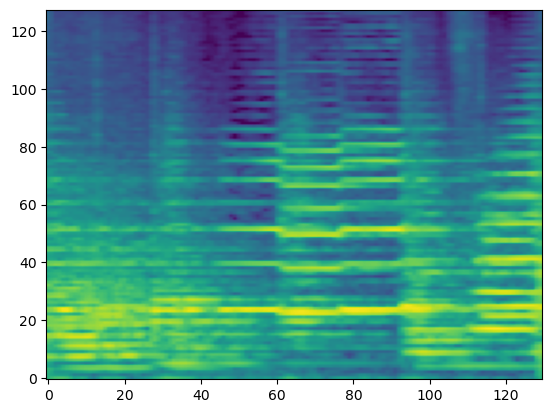

In [8]:
spec_db = torchaudio.transforms.AmplitudeToDB(stype="power", top_db=80)(spec)
_ = plt.imshow(spec_db.squeeze(), aspect="auto", origin='lower')